In [1]:
# Connor Lewis - CSL735
# Michael Spearin - MSS3627
# Data Science Lab - Lab 4
# Due February 14, 2017

import numpy as np
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

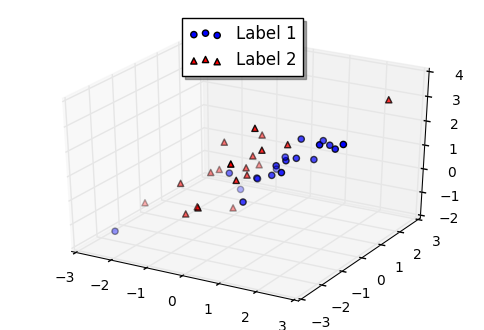

In [2]:
# Problem 1 - Linear Discriminant Analysis
    # Question 1
n = 20
d = 3
mean1 = [0,0,0]
cov1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [0, 0, 1]
cov2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n)

sample_data = [data1, data2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c = 'b', marker='o', label = "Label 1")
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c = 'r', marker='^', label = "Label 2")
legend = ax.legend(loc = 'upper center', shadow = True)
plt.show()

[[ 0.09744755 -0.04842389 -0.0420437 ]
 [-0.04842389  0.16610532 -0.09158889]
 [-0.0420437  -0.09158889  0.13532021]]
3
[[ 0.04367527]
 [ 0.08527587]
 [-0.1051218 ]]


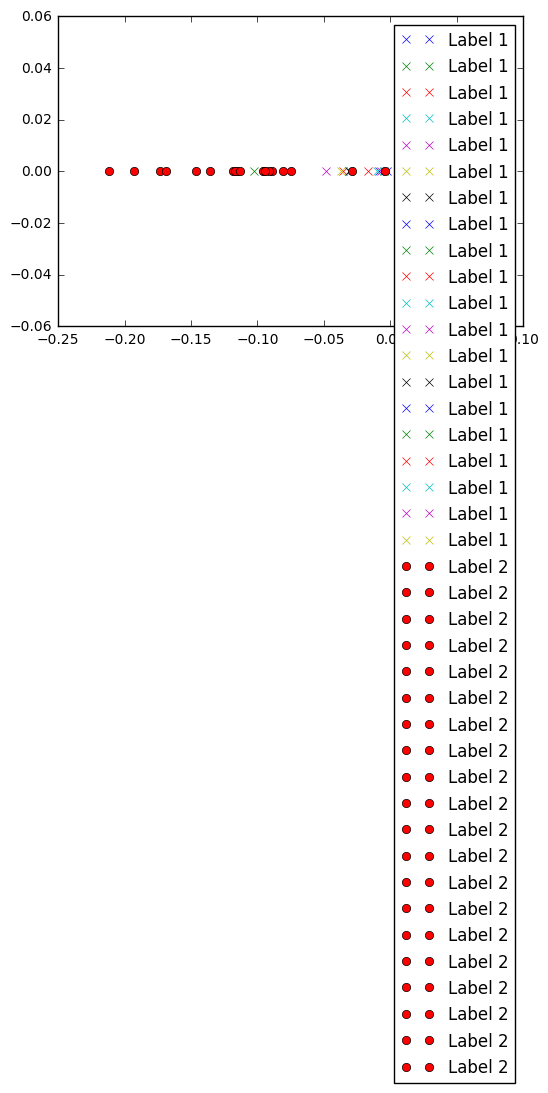

In [9]:
# Problem 1 - Linear Discriminant Analysis
#http://www.csd.uwo.ca/~olga/Courses/CS434a_541a/Lecture8.pdf
mean1 = np.matrix(np.mean(data1, axis = 0))
mean2 = np.matrix(np.mean(data2, axis = 0))
s_1 = len(data1) * np.cov(data1, rowvar = False)
s_2 = len(data2) * np.cov(data2, rowvar = False)
s_w = s_1 + s_2
print(scipy.linalg.inv(s_w))
print(np.linalg.matrix_rank(s_w)) # full rank so can use s_w^-1 * (mean1 - mean2)
mean_diff = mean1 - mean2
w = scipy.linalg.inv(s_w) * np.transpose(mean_diff)
print(w)
new_data1 = np.transpose(w) * np.transpose(data1)
new_data2 = np.transpose(w) * np.transpose(data2)
new_sampledata = [new_data1, new_data2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_data1, np.zeros(new_data1.shape[0]), label='Label 1', marker='x', linestyle='')
ax.plot(new_data2, np.zeros(new_data2.shape[0]), c='r', label='Label 2', marker='o', linestyle='')
ax.legend()
plt.show()

In [4]:
# Problem 1 - Linear Discriminant Analysis
    # Question 3
lda = LinearDiscriminantAnalysis()


In [5]:
# Problem 2 - Using Low Rank Structure for Corrupted Entries

In [6]:
# Problem 3 - Getting More into Kaggle